## Librerias

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Problema 

Considere un péndulo forzado cuyo movimiento cumple la siguiente ecuación diferencial, 

$$
\frac{d^2{\theta}}{d^2t}=-\frac{g}{l}\sin{\theta}+C\cos{\theta}\sin{\Omega t},
$$

donde $C$ y $\Omega$ son constantes.



a) Escriba la ecuación como un sistema dos ecuaciones diferenciales de primer orden.

Sus ecuaciones aqui

. 
$$
\frac{d\theta}{dt} = \omega
$$
.  
$$
\frac{d\omega}{dt} = -\frac{g}{l}\sin{\theta} + C \cos{\theta} \sin{\Omega}t
$$
.

.

.

b) El metodo Runge-Kutta para ecuaciones diff de primer orden está dado por, 

$$\frac{dy(t)}{dt} = f(t, y)$$

$$y_{n+1}=y_n+\frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$

\begin{align}
k_1 &= hf(t_n,y_n) \\
k_2 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_1}{2}\right)\\
k_3 &= hf\left( t_n + \frac{h}{2},\, y_n + \frac{k_2}{2}\right)\\
k_4 &= hf(t_n + h,y_n + k_3)
\end{align}

Mientras que el método Runge-Kutta para ecuaciones diff de segundo orden está dado por,


 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)

 Explique en breves palabras las ecuaciones para el segundo orden de Runge Kutta.

Su texto aqui, 

.

.

.

.

.

c) Usando la implementación de Runge Kutta en primer orden del siguiente [notebook](https://github.com/diegour1/MetodosComputacionales2/blob/main/Notebooks/06%20-%20first_order_differential_equations.ipynb), implemente el metodo de runge-kutta de 2do orden.

Pista: Existen dos formas de implementar runge kutta 2do orden, planteando las ecuaciones anteriores de forma completa, o planteando runge-kutta de una forma vectorial donde $[d\theta/dt, d\omega/dt] = [F(\theta, \omega, t), f(\theta, \omega, t)]$

In [21]:
### su codigo aqui

def runge_kutta_segundo_orden(f, v0, x0, t0, tf, h):
  vs = [v0]
  xs = [x0]

  for t in np.arange(t0, tf, h):
    k1 = h * v0
    l1 = h * f(x0, v0, t)
    
    k2 = h * (v0 + l1/2) 
    l2 = h * f(x0 + k1/2, v0 + l1/2, t + h/2)
    
    k3 = h * (v0 + l2/2) 
    l3 = h * f(x0 + k2/2, v0 + l2/2, t + h/2)
    
    k4 = h * (v0 + l3/2) 
    l4 = h * f(x0 + k3/2, v0 + l3/2, t +h/2)
    
    k4 = h * (v0 + l3) 
    l4 = h * f(x0 + k3, v0 + l3, t+ h)
    
    
    v1 = v0 + (l1 + 2*l2 + 2*l3 + l4)/6
    vs.append(v1)
    v0 = v1
    
    x1 = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    xs.append(x1)
    x0 = x1
    
  return np.linspace(t0,tf,len(vs)), np.array(vs), np.array(xs)


d) Resuelva la ecuación de $\theta$ en función de $t$ con $l = 10 \text{cm}$, $C = 2\text{s}^{-2}$, y $\Omega = 5 \text{s}^{-1}$. Genere un gráfico de $\theta$ en función del tiempo desde $t=0$ s hasta $t=10$ s. Las condiciones iniciales son $\theta = 0$ y $\text{d}\theta/\text{d}t = 0$.

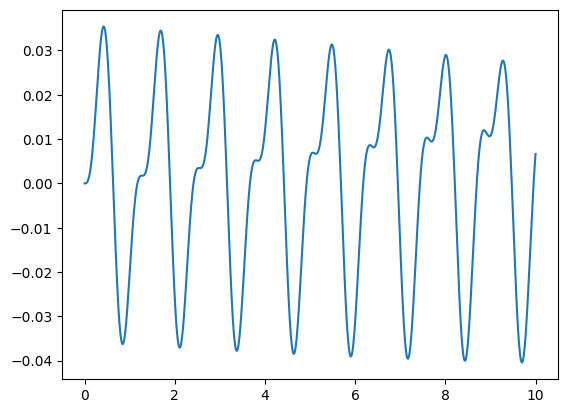

In [25]:
# su codigo aqui
v0 = 0.0
t0 = 0.0
x0 = 0.0
tf = 10.0
h = 0.01
l = 0.1
C = 2.0
O = 5.0

def f(x,v,t):
  return (-9.8/l)*np.sin(x) + C*np.cos(x)*np.sin(O*t)

t, _, y_rk2 = runge_kutta_segundo_orden(f, v0, x0, t0, tf, h)

plt.plot(t, y_rk2)

